## NBA Skills Improvement Project Part 4 - Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')

In [3]:
shooting_train = pd.read_csv("C:/Users/kevin/Downloads/three point shooting model training set.csv")
shooting_test = pd.read_csv("C:/Users/kevin/Downloads/three point shooting model test set.csv")
finishing_train = pd.read_csv("C:/Users/kevin/Downloads/paint scoring model training set.csv")
finishing_test = pd.read_csv("C:/Users/kevin/Downloads/paint scoring model test set.csv")
defense_train = pd.read_csv("C:/Users/kevin/Downloads/defensive BPM model training set.csv")
defense_test = pd.read_csv("C:/Users/kevin/Downloads/defensive BPM model test set.csv")

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Shooting Improvement Models

In [5]:
shooting_train.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'FG%', 'Dist.', '2P_FGA%',
       '0-3_FGA%', '3-10_FGA%', '10-16_FGA%', '16-3P_FGA%', '3P_FGA%',
       '2P_FG%', '0-3_FG%', '3-10_FG%', '10-16_FG%', '16-3P_FG%', '3P_FG%',
       '2P_FGast', '3P_FGast', 'Dunks_%FGA', 'Dunks_#', 'Corner_%3PA',
       'Corner_3P%', 'Heaves_Att.', 'Heaves_#', 'Year', 'PERSON_ID',
       'FIRST_NAME', 'LAST_NAME', 'DISPLAY_FIRST_LAST',
       'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST', 'PLAYER_SLUG',
       'BIRTHDATE', 'SCHOOL', 'COUNTRY', 'LAST_AFFILIATION', 'HEIGHT',
       'WEIGHT', 'SEASON_EXP', 'POSITION', 'ROSTERSTATUS',
       'GAMES_PLAYED_CURRENT_SEASON_FLAG', 'TEAM_ID', 'PLAYERCODE',
       'FROM_YEAR', 'TO_YEAR', 'DLEAGUE_FLAG', 'NBA_FLAG', 'GAMES_PLAYED_FLAG',
       'DRAFT_YEAR', 'GREATEST_75_FLAG', 'Quartile', 'FIRST_2', 'NEXT_2',
       'Improved'],
      dtype='object')

#### Logistic Regression

In [4]:
shooting_features = ['Age', 'G', 'MP', 'FG%', 'Dist.', '2P_FGA%',
       '0-3_FGA%', '3-10_FGA%', '10-16_FGA%', '16-3P_FGA%', '3P_FGA%',
       '2P_FG%', '0-3_FG%', '3-10_FG%', '10-16_FG%', '16-3P_FG%', '3P_FG%',
       '2P_FGast', '3P_FGast', 'Dunks_%FGA', 'Dunks_#', 'Corner_%3PA',
       'Corner_3P%', 'HEIGHT', 'WEIGHT']

shooting_target = ['Improved']

This function below aggregates all players into row. It averages a player's first two seasons, which is what we want to use to predict whether they will improve after those 2 seasons. The caveat with averaging the two seasons stats is that some players may have a much larger sample size in one season over the other skewing inputs.

In [5]:
def aggregate_data(df, features):
    aggregated_data = pd.DataFrame(columns=df.columns)
    for player in df['Player'].unique():
        player_data = df[df['Player'] == player].head(2)
        aggregated_stats = player_data[features].mean()
        static_values = player_data.iloc[0].drop(shooting_features)  # Get static values from the first row
        aggregated_row = pd.concat([aggregated_stats, static_values])
        aggregated_data = aggregated_data.append(aggregated_row, ignore_index=True)
    return aggregated_data

In [ ]:
shooting_train_agg = aggregate_data(shooting_train, shooting_features)

In [7]:
shooting_train_agg.to_csv('C:/Users/kevin/Downloads/three shooting aggregate training set.csv')

In [8]:
shooting_train[shooting_train['Player'] == 'Emmanuel Mudiay']

,Player,Pos,Age,Tm,G,MP,FG%,Dist.,2P_FGA%,0-3_FGA%,3-10_FGA%,10-16_FGA%,16-3P_FGA%,3P_FGA%,2P_FG%,0-3_FG%,3-10_FG%,10-16_FG%,16-3P_FG%,3P_FG%,2P_FGast,3P_FGast,Dunks_%FGA,Dunks_#,Corner_%3PA,Corner_3P%,Heaves_Att.,Heaves_#,Year,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,GREATEST_75_FLAG,Quartile,FIRST_2,NEXT_2,Improved
266,Emmanuel Mudiay,PG,19,DEN,68,2068,0.364,12.7,0.744,0.293,0.117,0.146,0.186,0.256,0.379,0.475,0.292,0.311,0.339,0.319,0.286,0.730,0.018,14,0.078,0.278,1,0,2016,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,2,2,2,No
267,Emmanuel Mudiay,PG,20,DEN,55,1406,0.377,12.6,0.677,0.363,0.113,0.111,0.094,0.323,0.408,0.505,0.290,0.262,0.327,0.315,0.368,0.911,0.025,12,0.208,0.297,1,0,2017,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,2,2,2,No
268,Emmanuel Mudiay,PG,21,TOT,64,1245,0.388,12.8,0.719,0.238,0.203,0.154,0.124,0.281,0.415,0.560,0.336,0.358,0.338,0.318,0.306,0.787,0.013,7,0.169,0.520,3,0,2018,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,2,2,2,No
269,Emmanuel Mudiay,PG,22,NYK,59,1607,0.446,12.7,0.716,0.322,0.115,0.169,0.111,0.284,0.492,0.538,0.388,0.488,0.476,0.329,0.226,0.855,0.015,10,0.157,0.424,0,0,2019,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,2,2,2,No
270,Emmanuel Mudiay,PG,23,UTA,54,850,0.462,12.5,0.734,0.266,0.180,0.223,0.064,0.266,0.504,0.586,0.441,0.466,0.476,0.345,0.273,0.700,0.021,4,0.276,0.292,1,0,2020,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,3,2,2,No
271,Emmanuel Mudiay,PG,25,SAC,2,11,0.000,13.0,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0,2022,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,1,2,2,No


In [9]:
shooting_train_agg[shooting_train_agg['Player'] == 'Emmanuel Mudiay']

,Player,Pos,Age,Tm,G,MP,FG%,Dist.,2P_FGA%,0-3_FGA%,3-10_FGA%,10-16_FGA%,16-3P_FGA%,3P_FGA%,2P_FG%,0-3_FG%,3-10_FG%,10-16_FG%,16-3P_FG%,3P_FG%,2P_FGast,3P_FGast,Dunks_%FGA,Dunks_#,Corner_%3PA,Corner_3P%,Heaves_Att.,Heaves_#,Year,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,GREATEST_75_FLAG,Quartile,FIRST_2,NEXT_2,Improved
45,Emmanuel Mudiay,PG,19.5,DEN,61.5,1737.0,0.3705,12.65,0.7105,0.328,0.115,0.1285,0.14,0.2895,0.3935,0.49,0.291,0.2865,0.333,0.317,0.327,0.8205,0.0215,13.0,0.143,0.2875,1,0,2016,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,2,2,2,No


This function aggregates the data for each player from their first two seasons by averaging the numbers. A more robust version of this project would find additional data sources to calculate the actual values for each of these columns for a player's first two years. For example, if a player had much more usage in season 2 than season 1, that season's stats should matter a lot more, but this current model weights the final percentages from both years evenly.

In [10]:
shooting_train_agg['Improved'].value_counts()

Yes    93
No     73
Name: Improved, dtype: int64

56% of players in the training set improved.

In [ ]:
model = LogisticRegression()
model.fit(shooting_train_agg[shooting_features], shooting_train_agg[shooting_target])

In [ ]:
shooting_test_agg = aggregate_data(shooting_test, shooting_features)

In [13]:
predictions = model.predict(shooting_test_agg[shooting_features])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=shooting_test_agg.index)
combination = pd.concat([shooting_test_agg[["Player", "DRAFT_YEAR", "FIRST_2"]], predictions], axis=1)

In [14]:
combination.sort_values(by='Player', ascending=True).head(10)

,Player,DRAFT_YEAR,FIRST_2,predictions
0,Aaron Nesmith,2020,3,Yes
1,Aleksej Pokusevski,2020,2,Yes
2,Anthony Edwards,2020,3,Yes
3,Bones Hyland,2021,3,Yes
4,CJ Elleby,2020,2,Yes
5,Cade Cunningham,2021,2,Yes
6,Cam Thomas,2021,3,Yes
7,Cassius Stanley,2020,1,Yes
8,Charles Bassey,2021,3,Yes
9,Chris Duarte,2021,3,Yes


In [15]:
combination['predictions'].value_counts()

Yes    67
No     12
Name: predictions, dtype: int64

When running our model on players yet to play long enough to be included in the training set, we predict that 67 of 79 players improve their shooting by jumping to another quartile. This is probably too high, but in conjunction with the stat from our training set that 56% of players improve their shooting -- shows that shooting is more likely to improve.

In [16]:
predictions = model.predict(shooting_train_agg[shooting_features])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=shooting_train_agg.index)
combination = pd.concat([shooting_train_agg[["Player", "DRAFT_YEAR", "FIRST_2", "Improved"]], predictions], axis=1)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(shooting_train_agg['Improved'], combination['predictions'])

0.6506024096385542

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(shooting_train_agg['Improved'], combination['predictions']))
print('\n')
confusion_matrix(shooting_train_agg['Improved'], combination['predictions'])

              precision    recall  f1-score   support

          No       0.67      0.40      0.50        73
         Yes       0.64      0.85      0.73        93

    accuracy                           0.65       166
   macro avg       0.66      0.62      0.62       166
weighted avg       0.66      0.65      0.63       166





array([[29, 44],
       [14, 79]], dtype=int64)

The model accurately predicted the improvement of 65% of players, which means it is more accurate than simply taking the 56% chance that a player improves outside shooting as a whole.

In [20]:
import statsmodels.api as sm

dummy_target = pd.get_dummies(shooting_train_agg[shooting_target],columns=['Improved'],drop_first=True)

results = sm.OLS(dummy_target,shooting_train_agg[shooting_features]).fit()
p_value = results.pvalues[shooting_train_agg[shooting_features].columns]

In [21]:
p_value.sort_values()

FG%            0.129285
Dunks_%FGA     0.242831
Corner_%3PA    0.244205
10-16_FGA%     0.384400
16-3P_FGA%     0.397723
3-10_FGA%      0.409945
0-3_FG%        0.411444
Dunks_#        0.427501
2P_FGA%        0.427833
10-16_FG%      0.444366
0-3_FGA%       0.444781
Age            0.501015
16-3P_FG%      0.508318
MP             0.515796
3P_FGast       0.543850
G              0.577230
3P_FGA%        0.592744
Corner_3P%     0.626576
3P_FG%         0.702538
Dist.          0.725680
2P_FG%         0.729751
2P_FGast       0.774327
WEIGHT         0.881961
3-10_FG%       0.994825
HEIGHT         0.995650
dtype: float64

None of the features are statistically significant, but the feature that is closest is FG%. And as a positive coefficient, this means that a more efficient player is likely to also improve their 3 point shooting from the first two years of their career to the next two.

In [91]:
def plot_feature_weight(model, features, p_values):
    # Get coefficients from the logistic regression model
    coefficients = model.coef_[0]

    # Create a DataFrame to display feature names, their corresponding coefficients, and p-values
    feature_info = pd.DataFrame({
        'Feature': features,
        'Coefficient': coefficients,
        'P-Value': p_values
    })

    # Sort the features by coefficient magnitude
    feature_info['Absolute Coefficient'] = abs(feature_info['Coefficient'])
    sorted_features = feature_info.sort_values(by='Absolute Coefficient', ascending=False)

    # Create a list to store bar colors and edge colors
    bar_colors = ['red' if coef < 0 else 'blue' for coef in sorted_features['Coefficient']]
    bar_edge_colors = ['black' for _ in sorted_features['Coefficient']]  # default edge color is black

    # Highlight bars with yellow border if the corresponding p-value is under 0.05
    for idx, row in sorted_features.iterrows():
        if row['P-Value'] < 0.05:
            # Get the integer index corresponding to the row
            integer_idx = sorted_features.index.get_loc(idx)
            bar_colors[integer_idx] = 'blue'  # Set the original color
            bar_edge_colors[integer_idx] = 'yellow'  # Set the border color to yellow

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features['Feature'], sorted_features['Absolute Coefficient'], linewidth=3, color=bar_colors, edgecolor=bar_edge_colors)
    plt.xlabel('Absolute Coefficient')
    plt.title('Feature Weight for Predicting Improved = Yes')
    plt.gca().invert_yaxis()  # Reverse the order for better visualization

    # Add a note to the chart
    plt.text(0.40, 0.05, 'Red bars indicate negative coefficients', transform=plt.gca().transAxes,
             color='red', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', edgecolor='red'))
    plt.text(0.40, 0.10, 'Yellow borders indicate statistically significant features (p < 0.05)', transform=plt.gca().transAxes,
             color='black', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', edgecolor='yellow'))

    # Show the plot
    plt.show()

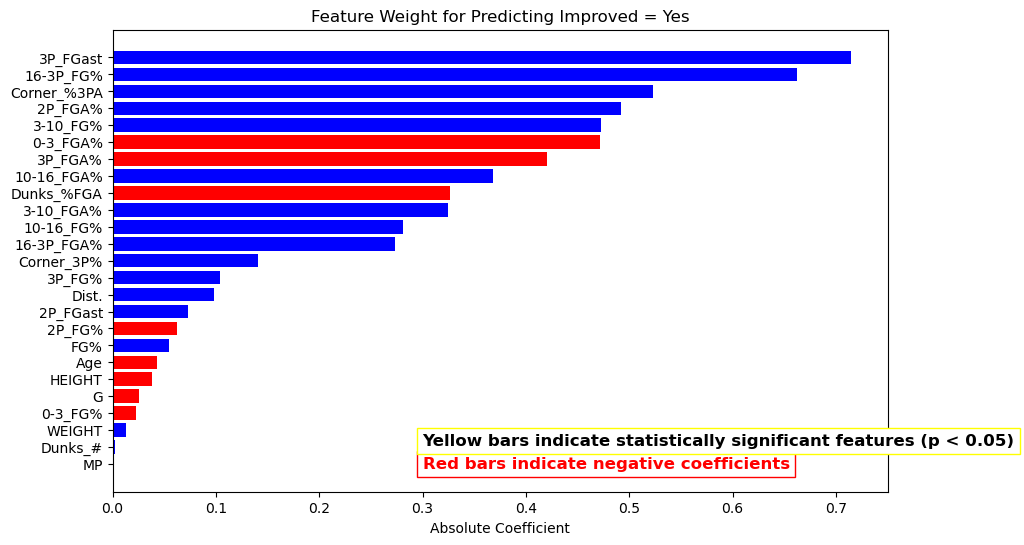

In [23]:
plot_feature_weight(model, shooting_features, p_value)

None of these features on their own are statistically significant.

#### K Means Clustering

In [24]:
shooting_clusters = shooting_train_agg[shooting_train_agg['Improved'] == 'Yes']

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
silhouette = []

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=99)
    cluster_labels = kmeans.fit_predict(shooting_clusters[shooting_features])
    
    centers = kmeans.cluster_centers_
    
    score = silhouette_score(shooting_clusters[shooting_features], cluster_labels)
    silhouette.append(score)
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

Text(0.5, 0.98, 'Identifying Optimal Cluster #')

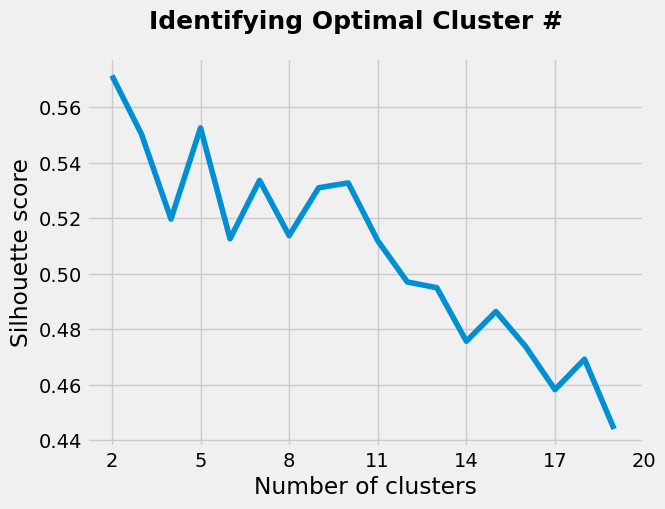

In [30]:
plt.style.use('fivethirtyeight')

silhouette_fig, ax = plt.subplots()

ax.plot(range(2,20), silhouette)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

ax.set_xticks(np.arange(2,21, 3.0))

silhouette_fig.suptitle('Identifying Optimal Cluster #', weight = 'bold', size = 18)

Will try 5 clusters to determine what archetypes of players are likely to improve their shooting.

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 1)
kmeans.fit(shooting_clusters[shooting_features])

y_kmeans = kmeans.predict(shooting_clusters[shooting_features])

df_cluster = pd.DataFrame()

df_cluster['Player'] = shooting_clusters['Player']
df_cluster['Cluster'] = y_kmeans
df_cluster

df_cluster.to_csv('C:/Users/kevin/Downloads/shooting improvers 5 clusters.csv', index = False)

In analyzing the clusters, here is what I found of clusters of players who improved their shooting:
- Cluster 0: guys who didn't play much (Abdel Nader, Chandler Hutchison)
- Cluster 1: lottery pick type of players (Andrew Wiggins, Ben McLemore, Trey Burke)
- Cluster 2: undersized guards and forwards known to have a capable jumper (Coby White, D'Angelo Russell, Gary Harris)
- Cluster 3: players who don't shoot (Isaiah Hartenstein, Romeo Langford)
- Cluster 4: tough guy archetype, players known for defense (Aaron Gordon, Grant Williams, De'Anthony Melton)

### Paint Finishing Models

In [ ]:
finishing_train_agg = aggregate_data(finishing_train, shooting_features)

In [9]:
finishing_train_agg.to_csv('C:/Users/kevin/Downloads/finishing aggregate training set.csv')

In [30]:
finishing_train[finishing_train['Player'] == 'Emmanuel Mudiay']

,Player,Pos,Age,Tm,G,MP,FG%,Dist.,2P_FGA%,0-3_FGA%,3-10_FGA%,10-16_FGA%,16-3P_FGA%,3P_FGA%,2P_FG%,0-3_FG%,3-10_FG%,10-16_FG%,16-3P_FG%,3P_FG%,2P_FGast,3P_FGast,Dunks_%FGA,Dunks_#,Corner_%3PA,Corner_3P%,Heaves_Att.,Heaves_#,Year,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,GREATEST_75_FLAG,Quartile,FIRST_2,NEXT_2,Improved
273,Emmanuel Mudiay,PG,19,DEN,68,2068,0.364,12.7,0.744,0.293,0.117,0.146,0.186,0.256,0.379,0.475,0.292,0.311,0.339,0.319,0.286,0.730,0.018,14,0.078,0.278,1,0,2016,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,1,1,1,No
274,Emmanuel Mudiay,PG,20,DEN,55,1406,0.377,12.6,0.677,0.363,0.113,0.111,0.094,0.323,0.408,0.505,0.290,0.262,0.327,0.315,0.368,0.911,0.025,12,0.208,0.297,1,0,2017,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,1,1,1,No
275,Emmanuel Mudiay,PG,21,TOT,64,1245,0.388,12.8,0.719,0.238,0.203,0.154,0.124,0.281,0.415,0.560,0.336,0.358,0.338,0.318,0.306,0.787,0.013,7,0.169,0.520,3,0,2018,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,1,1,1,No
276,Emmanuel Mudiay,PG,22,NYK,59,1607,0.446,12.7,0.716,0.322,0.115,0.169,0.111,0.284,0.492,0.538,0.388,0.488,0.476,0.329,0.226,0.855,0.015,10,0.157,0.424,0,0,2019,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,1,1,1,No
277,Emmanuel Mudiay,PG,23,UTA,54,850,0.462,12.5,0.734,0.266,0.180,0.223,0.064,0.266,0.504,0.586,0.441,0.466,0.476,0.345,0.273,0.700,0.021,4,0.276,0.292,1,0,2020,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,2,1,1,No
278,Emmanuel Mudiay,PG,25,SAC,2,11,0.000,13.0,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0,2022,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,1,1,1,No


In [31]:
finishing_train_agg[finishing_train_agg['Player'] == 'Emmanuel Mudiay']

,Player,Pos,Age,Tm,G,MP,FG%,Dist.,2P_FGA%,0-3_FGA%,3-10_FGA%,10-16_FGA%,16-3P_FGA%,3P_FGA%,2P_FG%,0-3_FG%,3-10_FG%,10-16_FG%,16-3P_FG%,3P_FG%,2P_FGast,3P_FGast,Dunks_%FGA,Dunks_#,Corner_%3PA,Corner_3P%,Heaves_Att.,Heaves_#,Year,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,GREATEST_75_FLAG,Quartile,FIRST_2,NEXT_2,Improved
45,Emmanuel Mudiay,PG,19.5,DEN,61.5,1737.0,0.3705,12.65,0.7105,0.328,0.115,0.1285,0.14,0.2895,0.3935,0.49,0.291,0.2865,0.333,0.317,0.327,0.8205,0.0215,13.0,0.143,0.2875,1,0,2016,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,1,1,1,No


In [32]:
finishing_train_agg['Improved'].value_counts()

No     79
Yes    76
Name: Improved, dtype: int64

49% of players in the training set improved. This is less than the 56% of players that improved their three point shooting.

#### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(finishing_train_agg[shooting_features], finishing_train_agg[shooting_target])

In [ ]:
finishing_test_agg = aggregate_data(finishing_test, shooting_features)

In [35]:
predictions = model.predict(finishing_test_agg[shooting_features])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=finishing_test_agg.index)
combination = pd.concat([finishing_test_agg[["Player", "DRAFT_YEAR", "FIRST_2"]], predictions], axis=1)

In [36]:
combination.sort_values(by='Player', ascending=True).head(10)

,Player,DRAFT_YEAR,FIRST_2,predictions
0,Aaron Wiggins,2021,3,No
1,Aleksej Pokusevski,2020,3,Yes
2,Anthony Edwards,2020,2,No
3,Ayo Dosunmu,2021,3,No
4,Bones Hyland,2021,3,No
5,Cade Cunningham,2021,1,No
6,Cam Thomas,2021,2,Yes
7,Cassius Stanley,2020,1,No
8,Cassius Winston,2020,1,Yes
9,Chris Duarte,2021,2,No


In [37]:
combination['predictions'].value_counts()

Yes    34
No     32
Name: predictions, dtype: int64

This model predicted about half of players in the 2020 and 2021 draft classes to improve their paint efficiency over their next two seasons.

In [38]:
predictions = model.predict(finishing_train_agg[shooting_features])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=finishing_train_agg.index)
combination = pd.concat([finishing_train_agg[["Player", "DRAFT_YEAR", "FIRST_2", "Improved"]], predictions], axis=1)

In [39]:
accuracy_score(finishing_train_agg['Improved'], combination['predictions'])

0.6451612903225806

In [40]:
print(classification_report(finishing_train_agg['Improved'], combination['predictions']))
print('\n')
confusion_matrix(finishing_train_agg['Improved'], combination['predictions'])

              precision    recall  f1-score   support

          No       0.65      0.66      0.65        79
         Yes       0.64      0.63      0.64        76

    accuracy                           0.65       155
   macro avg       0.65      0.64      0.64       155
weighted avg       0.65      0.65      0.65       155





array([[52, 27],
       [28, 48]], dtype=int64)

In [41]:
dummy_target = pd.get_dummies(finishing_train_agg[shooting_target],columns=['Improved'],drop_first=True)

results = sm.OLS(dummy_target,finishing_train_agg[shooting_features]).fit()
p_value = results.pvalues[finishing_train_agg[shooting_features].columns]

In [42]:
p_value.sort_values()

G              0.008339
MP             0.009891
0-3_FG%        0.034940
2P_FGast       0.105948
10-16_FG%      0.185824
3P_FG%         0.210382
Dunks_#        0.213542
Dist.          0.237427
3P_FGast       0.324551
3P_FGA%        0.384543
3-10_FG%       0.414293
WEIGHT         0.526551
FG%            0.532097
Corner_%3PA    0.552948
Corner_3P%     0.633053
16-3P_FG%      0.664277
2P_FG%         0.688602
HEIGHT         0.758563
Age            0.822692
16-3P_FGA%     0.934734
Dunks_%FGA     0.972615
10-16_FGA%     0.981801
0-3_FGA%       0.983189
3-10_FGA%      0.988609
2P_FGA%        0.996376
dtype: float64

In this model for paint finishing, there are three features that are statistically significant. Games and minutes played (positive coefficients) both have very low p-values, indicating that this is a skill that improves from getting more playing time. Additionally, the paint scoring FG% of the first two years is statistically significant, which understandably indicates if a player shows potential that they will likely get better. This is unlike three point shooting, which can be more of an acquired skill.

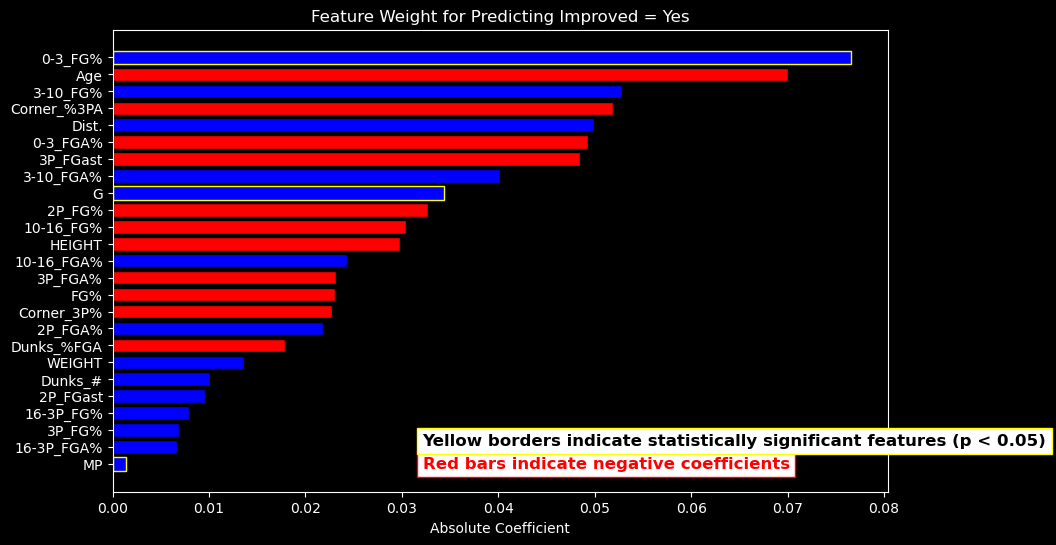

In [57]:
plot_feature_weight(model, shooting_features, p_value)

#### K Means Clustering

In [58]:
finishing_clusters = finishing_train_agg[finishing_train_agg['Improved'] == 'Yes']

In [ ]:
silhouette = []

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=99)
    cluster_labels = kmeans.fit_predict(finishing_clusters[shooting_features])
    
    centers = kmeans.cluster_centers_
    
    score = silhouette_score(finishing_clusters[shooting_features], cluster_labels)
    silhouette.append(score)
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

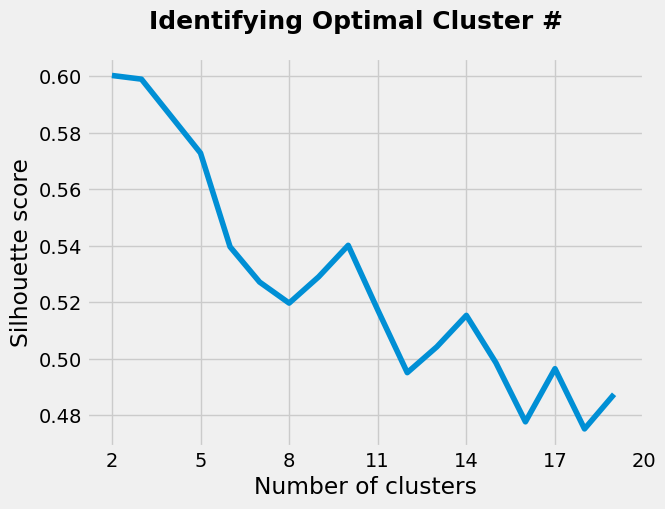

In [63]:
plt.style.use('fivethirtyeight')

silhouette_fig, ax = plt.subplots()

ax.plot(range(2,20), silhouette)

ax.set_xlabel('Number of clusters', color='black')
ax.set_ylabel('Silhouette score', color='black')

ax.set_xticks(np.arange(2,21, 3.0))

silhouette_fig.suptitle('Identifying Optimal Cluster #', weight = 'bold', size = 18, color='black')

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(finishing_clusters[shooting_features])

y_kmeans = kmeans.predict(finishing_clusters[shooting_features])

In [65]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = finishing_clusters['Player']
df_cluster['Cluster'] = y_kmeans
df_cluster

df_cluster.to_csv('C:/Users/kevin/Downloads/finishing improvers 3 clusters.csv', index = False)

Here's what I found from the clusters of players that improved:
- Cluster 0: guards with lower shot tendency (Jevon Carter, Malik Beasley, Joe Harris)
- Cluster 1: high usage players (Darius Garland, De'Aaron Fox, Giannis Antetokounmpo)
- Cluster 2: the  rugged defender archetype (Aaron Gordon, Grant Williams, Kris Dunn)

This suggests playing more and increasing paint efficiency is often what leads to creating an All-Star. The rugged defender type is also a common theme in the clusters across both three point shooting and paint scoring. It might be archetype teams go after as having a better chance to improve.

### Defensive Improvement Models

In [69]:
defense_train.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Year',
       'PERSON_ID', 'FIRST_NAME', 'LAST_NAME', 'DISPLAY_FIRST_LAST',
       'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST', 'PLAYER_SLUG',
       'BIRTHDATE', 'SCHOOL', 'COUNTRY', 'LAST_AFFILIATION', 'HEIGHT',
       'WEIGHT', 'SEASON_EXP', 'POSITION', 'ROSTERSTATUS',
       'GAMES_PLAYED_CURRENT_SEASON_FLAG', 'TEAM_ID', 'PLAYERCODE',
       'FROM_YEAR', 'TO_YEAR', 'DLEAGUE_FLAG', 'NBA_FLAG', 'GAMES_PLAYED_FLAG',
       'DRAFT_YEAR', 'GREATEST_75_FLAG', 'Quartile', 'FIRST_2', 'NEXT_2',
       'Improved'],
      dtype='object')

In [10]:
defense_features = ['Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'HEIGHT', 'WEIGHT']

defense_target = ['Improved']

In [11]:
def aggregate_data_defense(df, features):
    aggregated_data = pd.DataFrame(columns=df.columns)
    for player in df['Player'].unique():
        player_data = df[df['Player'] == player].head(2)
        aggregated_stats = player_data[features].mean()
        static_values = player_data.iloc[0].drop(defense_features)  # Get static values from the first row
        aggregated_row = pd.concat([aggregated_stats, static_values])
        aggregated_data = aggregated_data.append(aggregated_row, ignore_index=True)
    return aggregated_data

In [ ]:
defense_train_agg = aggregate_data_defense(defense_train, defense_features)

In [13]:
defense_train_agg.to_csv('C:/Users/kevin/Downloads/defensive BPM aggregate training set.csv')

In [73]:
defense_train[defense_train['Player'] == 'Emmanuel Mudiay']

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,GREATEST_75_FLAG,Quartile,FIRST_2,NEXT_2,Improved
293,Emmanuel Mudiay,PG,19,DEN,68,2068,9.9,0.437,0.256,0.231,1.7,10.9,6.2,29.0,1.6,1.4,17.9,25.7,-3.3,1.2,-2.1,-0.049,-2.3,-1.9,-4.2,-1.2,2016,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,1,1,1,No
294,Emmanuel Mudiay,PG,20,DEN,55,1406,10.9,0.483,0.323,0.303,2.3,11.6,7.0,21.8,1.4,0.7,16.5,22.6,-0.4,0.5,0.2,0.006,-1.6,-1.6,-3.2,-0.4,2017,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,1,1,1,No
295,Emmanuel Mudiay,PG,21,TOT,64,1245,11.5,0.474,0.281,0.245,2.3,11.3,6.8,24.5,1.6,0.8,16.2,24.4,-0.8,0.7,0.0,-0.002,-2.1,-1.8,-3.9,-0.6,2018,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,1,1,1,No
296,Emmanuel Mudiay,PG,22,NYK,59,1607,14.6,0.531,0.284,0.251,2.1,10.9,6.4,24.2,1.3,1.0,14.6,25.6,0.1,0.7,0.8,0.023,-0.2,-1.8,-2.0,0.0,2019,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,1,1,1,No
297,Emmanuel Mudiay,PG,23,UTA,54,850,13.0,0.543,0.266,0.254,2.4,13.5,8.2,20.9,1.4,1.0,17.3,22.6,0.1,0.9,1.0,0.057,-1.8,-0.1,-1.9,0.0,2020,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,3,1,1,No
298,Emmanuel Mudiay,PG,25,SAC,2,11,12.3,0.399,0.000,2.000,0.0,0.0,0.0,43.4,4.4,0.0,21.0,18.6,0.0,0.0,0.0,0.023,-2.7,1.5,-1.2,0.0,2022,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,4,1,1,No


In [74]:
defense_train_agg[defense_train_agg['Player'] == 'Emmanuel Mudiay']

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,GREATEST_75_FLAG,Quartile,FIRST_2,NEXT_2,Improved
51,Emmanuel Mudiay,PG,19.5,DEN,61.5,1737.0,10.4,0.46,0.2895,0.267,2.0,11.25,6.6,25.4,1.5,1.05,17.2,24.15,-1.85,0.85,-0.95,-0.0215,-1.95,-1.75,-3.7,-0.8,2016,1626144.0,Emmanuel,Mudiay,Emmanuel Mudiay,"Mudiay, Emmanuel",E. Mudiay,emmanuel-mudiay,1996-03-05T00:00:00,Guangdong,Democratic Republic of the Congo,Guangdong/Democratic Republic of the Congo,75.0,200.0,7.0,Guard,Inactive,N,0.0,emmanuel_mudiay,2015.0,2021.0,Y,Y,Y,2015,N,1,1,1,No


In [75]:
defense_train_agg['Improved'].value_counts()

No     86
Yes    79
Name: Improved, dtype: int64

48% of players in the training set improved defense. Around the same as the percent of players that improve paint scoring, not as high as those that improve three point shooting.

#### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(defense_train_agg[defense_features], defense_train_agg[defense_target])

In [ ]:
defense_test_agg = aggregate_data_defense(defense_test, defense_features)

In [78]:
predictions = model.predict(defense_test_agg[defense_features])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=defense_test_agg.index)
combination = pd.concat([defense_test_agg[["Player", "DRAFT_YEAR", "FIRST_2"]], predictions], axis=1)

In [79]:
combination.sort_values(by='Player', ascending=True).head(10)

,Player,DRAFT_YEAR,FIRST_2,predictions
0,Aaron Nesmith,2020,3,No
1,Aaron Wiggins,2021,2,Yes
2,Aleksej Pokusevski,2020,3,Yes
3,Anthony Edwards,2020,2,No
4,Ayo Dosunmu,2021,3,Yes
5,Bones Hyland,2021,2,Yes
6,CJ Elleby,2020,1,Yes
7,Cade Cunningham,2021,2,No
8,Cam Thomas,2021,1,No
9,Cassius Stanley,2020,1,No


In [80]:
combination['predictions'].value_counts()

No     46
Yes    45
Name: predictions, dtype: int64

Once again, the model predicts about half of the players in the 2020 and 2021 draft classes to improve at defense.

In [81]:
predictions = model.predict(defense_train_agg[defense_features])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=defense_train_agg.index)
combination = pd.concat([defense_train_agg[["Player", "DRAFT_YEAR", "FIRST_2", "Improved"]], predictions], axis=1)

In [82]:
accuracy_score(defense_train_agg['Improved'], combination['predictions'])

0.6727272727272727

In [83]:
print(classification_report(defense_train_agg['Improved'], combination['predictions']))
print('\n')
confusion_matrix(defense_train_agg['Improved'], combination['predictions'])

              precision    recall  f1-score   support

          No       0.66      0.78      0.71        86
         Yes       0.70      0.56      0.62        79

    accuracy                           0.67       165
   macro avg       0.68      0.67      0.67       165
weighted avg       0.68      0.67      0.67       165





array([[67, 19],
       [35, 44]], dtype=int64)

In [84]:
dummy_target = pd.get_dummies(defense_train_agg[defense_target],columns=['Improved'],drop_first=True)

results = sm.OLS(dummy_target,defense_train_agg[defense_features]).fit()
p_value = results.pvalues[defense_train_agg[defense_features].columns]

In [85]:
p_value.sort_values()

DWS       0.024289
WS        0.030787
BLK%      0.031158
OWS       0.035367
USG%      0.088012
Age       0.162882
DBPM      0.184207
WS/48     0.188142
WEIGHT    0.191714
BPM       0.224819
DRB%      0.228354
TRB%      0.251882
OBPM      0.253659
TOV%      0.291701
ORB%      0.334290
3PAr      0.336063
G         0.604020
PER       0.642835
HEIGHT    0.681640
FTr       0.709656
MP        0.750911
AST%      0.801923
STL%      0.825161
VORP      0.903027
TS%       0.933582
dtype: float64

There are four statistically significant features in this model, with three of them being win shares stats (total win shares, defensive win shares, and offensive win shares). The fact it is all phases of the game suggests better or smarter players in general improve at defense. This is also shown by the statistically significant feature, block %. There has been a theory for evaluating pre-draft players that block percentage and steal percentage would be good indicators of success in the NBA because those stats are often obtained with basketball IQ, knowing the right positions and predicting what other players on the court will do.

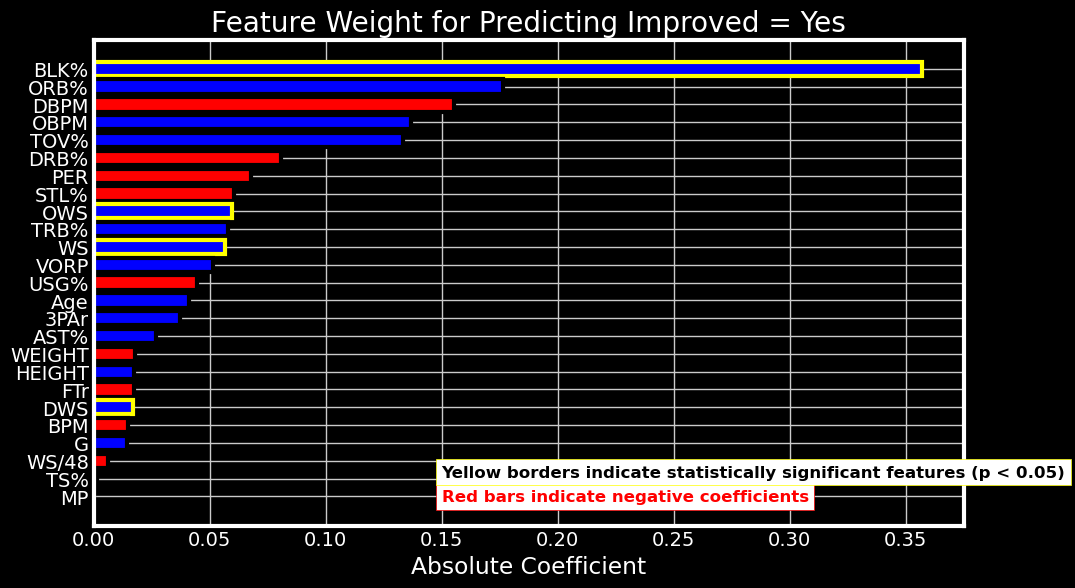

In [92]:
plot_feature_weight(model, defense_features, p_value)

#### K Means Clustering

In [93]:
defense_clusters = defense_train_agg[defense_train_agg['Improved'] == 'Yes']

In [ ]:
silhouette = []

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=99)
    cluster_labels = kmeans.fit_predict(defense_clusters[defense_features])
    
    centers = kmeans.cluster_centers_
    
    score = silhouette_score(defense_clusters[defense_features], cluster_labels)
    silhouette.append(score)
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

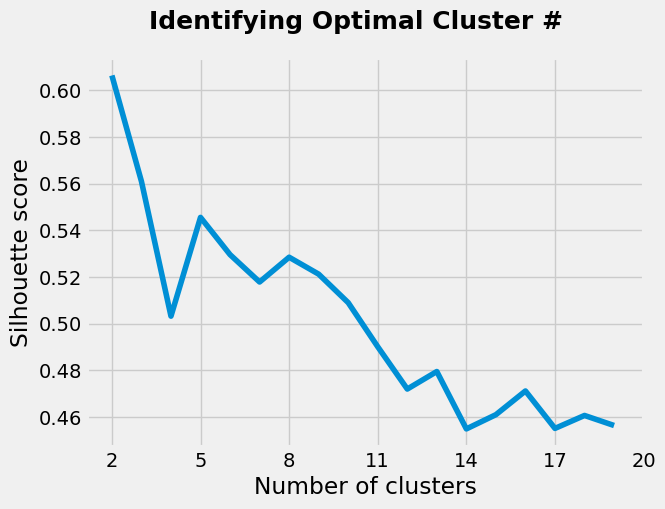

In [95]:
plt.style.use('fivethirtyeight')

silhouette_fig, ax = plt.subplots()

ax.plot(range(2,20), silhouette)

ax.set_xlabel('Number of clusters', color='black')
ax.set_ylabel('Silhouette score', color='black')

ax.set_xticks(np.arange(2,21, 3.0))

silhouette_fig.suptitle('Identifying Optimal Cluster #', weight = 'bold', size = 18, color='black')

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 1)
kmeans.fit(defense_clusters[defense_features])

y_kmeans = kmeans.predict(defense_clusters[defense_features])

In [97]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = defense_clusters['Player']
df_cluster['Cluster'] = y_kmeans
df_cluster

df_cluster.to_csv('C:/Users/kevin/Downloads/defense improvers 5 clusters.csv', index = False)

From the clusters I found:
- Cluster 0: players that don't play much (Adreian Payne, Chasson Randle)
- Cluster 1: high usage players (D'Angelo Russell, Ja Morant, Tyler Herro)
- Cluster 2: plus athletes (Ben McLemore, Collin Sexton, Victor Oladipo)
- Cluster 3: also players who don't play much.

Cluster 2 is often what draft evaluators are looking for in prospects, but defensive improvement might be more correlated with an overall intelligent player as opposed to very good raw athlete.